  # Predicting the mood of the person based on the song he /she is listening to
  
  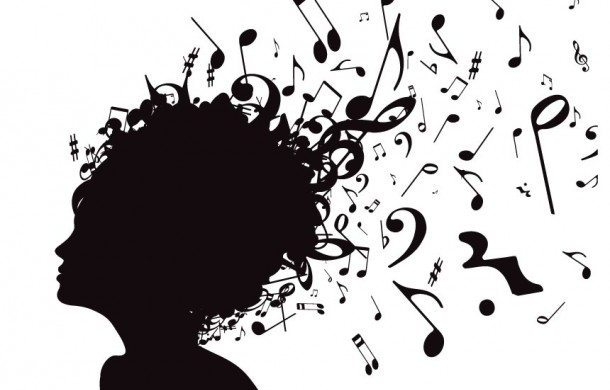
        The model will try to cluster the songs based on their features into    different groups .Then based on the song the person is listening to the model will try to classify the emotion group that song belonged to.In this way the model would be able to know the mood of the listener.





# New Section

## Importing the necessary libraries

In [372]:
## For storing the data into dataframes and all
import pandas as pd
## For numerical computations
import numpy as np
## For visualising purpose
import matplotlib.pyplot as plt
# To make this notebook's output stable across runs
np.random.seed(42)
## For visualisation purpose
import seaborn as sns
import warnings


## Importing the dataset

In [373]:
songs = pd.read_csv("data.csv")

songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [374]:
songs.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


## Exploratory Data Analysis

In [375]:
# examining the correlation between different features

corr_metrics=songs.corr()
corr_metrics.style.background_gradient()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
Unnamed: 0,1.000000,0.133055,-0.139615,-0.104185,-0.039880,-0.104641,-0.035611,-0.039962,0.021935,0.060639,-0.135362,-0.027890,-0.053235,-0.077812,-0.865969
acousticness,0.133055,1.000000,-0.179894,0.071536,-0.646319,0.144397,-0.081037,-0.117126,-0.562021,0.068028,-0.099893,-0.127596,-0.190353,-0.152227,-0.129627
danceability,-0.139615,-0.179894,1.000000,0.004695,0.038557,-0.130561,0.022325,-0.132044,0.104362,-0.047867,0.142661,-0.143538,0.128909,0.442061,0.176706
duration_ms,-0.104185,0.071536,0.004695,1.000000,-0.144473,0.305403,0.023570,0.023203,-0.273798,-0.074806,-0.079562,-0.076469,-0.040157,-0.120030,0.146749
energy,-0.039880,-0.646319,0.038557,-0.144473,1.000000,-0.122890,0.072886,0.217435,0.762177,-0.070263,0.093102,0.165721,0.182895,0.278383,0.039688
instrumentalness,-0.104641,0.144397,-0.130561,0.305403,-0.122890,1.000000,-0.009640,0.001063,-0.354625,-0.030099,-0.155349,0.000347,-0.070721,-0.194630,0.152594
key,-0.035611,-0.081037,0.022325,0.023570,0.072886,-0.009640,1.000000,0.049739,0.050929,-0.195040,0.019116,0.040301,0.024937,0.032485,0.033594
liveness,-0.039962,-0.117126,-0.132044,0.023203,0.217435,0.001063,0.049739,1.000000,0.156648,-0.018587,0.092403,0.010558,0.018199,-0.053011,0.026364
loudness,0.021935,-0.562021,0.104362,-0.273798,0.762177,-0.354625,0.050929,0.156648,1.000000,-0.044015,0.088844,0.156418,0.143011,0.204968,-0.072000
mode,0.060639,0.068028,-0.047867,-0.074806,-0.070263,-0.030099,-0.195040,-0.018587,-0.044015,1.000000,-0.049398,-0.059995,-0.039038,-0.032879,-0.072336


In [376]:
# Removing the unwanted columns 

features=songs.drop(columns=["song_title","artist","Unnamed: 0"])
features.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1


In [377]:

features.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


# Feature Scaling

In [378]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()


loudness = features[['loudness']].values
key = features[['key']].values
tempo = features[['tempo']].values
time_signature = features[['time_signature']].values
duration_ms = features[['duration_ms']].values


features[['loudness']] = min_max_scaler.fit_transform(loudness)
features[['key']] = min_max_scaler.fit_transform(key)
features[['tempo']]= min_max_scaler.fit_transform(tempo)
features[['time_signature']]= min_max_scaler.fit_transform(time_signature)
features[['duration_ms']] = min_max_scaler.fit_transform(duration_ms)

In [379]:
features.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,0.190735,0.434,0.021900,0.181818,0.1650,0.741141,1,0.4310,0.596033,0.75,0.286,1
1,0.1990,0.743,0.314481,0.359,0.006110,0.090909,0.1370,0.692162,1,0.0794,0.654474,0.75,0.588,1
2,0.0344,0.838,0.171624,0.412,0.000234,0.181818,0.1590,0.791369,1,0.2890,0.158539,0.75,0.173,1
3,0.6040,0.494,0.185488,0.338,0.510000,0.454545,0.0922,0.544709,1,0.0261,0.225162,0.75,0.230,1
4,0.1800,0.678,0.381202,0.561,0.512000,0.454545,0.4390,0.654132,0,0.0694,0.735659,0.75,0.904,1


## Performing Feature Reduction

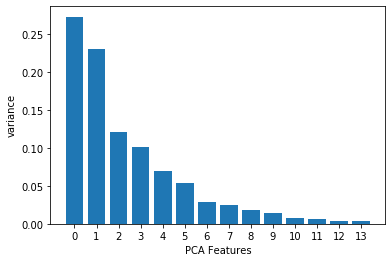

In [380]:
#Feature Reduction as with the help of this graph we can see the features having high variance
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(features)
xfeatures = range(pca.n_components_)
plt.bar(xfeatures,pca.explained_variance_)
plt.xticks(xfeatures)
plt.xlabel('PCA Features')
plt.ylabel('variance')
plt.show()

In [381]:
# So from above we can see five features are having high variance so we can remove the unwanted features
features=features.drop(columns=["duration_ms","energy","instrumentalness","key","mode","tempo","time_signature","valence","target"])
features.head()

,acousticness,danceability,liveness,loudness,speechiness
0,0.0102,0.833,0.1650,0.741141,0.4310
1,0.1990,0.743,0.1370,0.692162,0.0794
2,0.0344,0.838,0.1590,0.791369,0.2890
3,0.6040,0.494,0.0922,0.544709,0.0261
4,0.1800,0.678,0.4390,0.654132,0.0694


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C497177D08>,
      dtype=object)

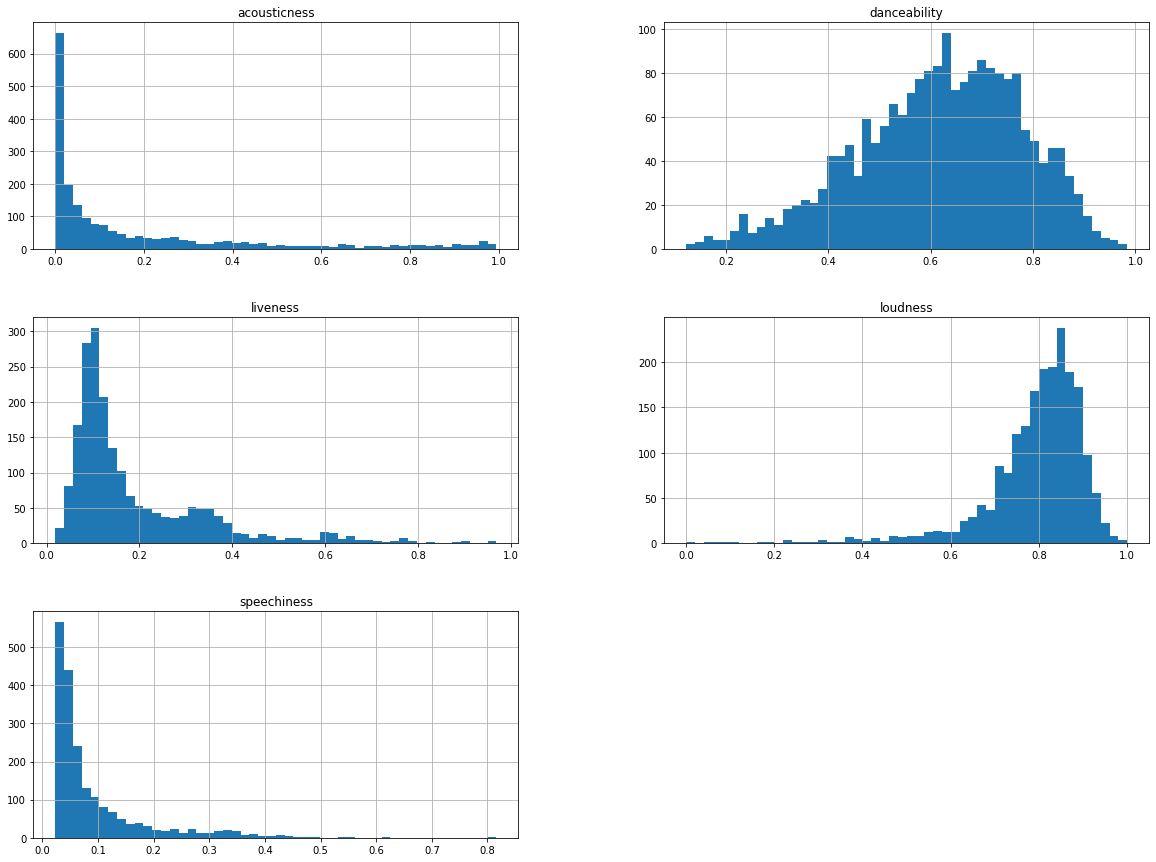

In [382]:
features.hist(bins=50,figsize=(20,15))

# Now we will try to cluster the songs on the basis of emotion of the songs

In [383]:
## For clustering we will be KMeans Clustering for that first we need to know the optimum number of clusters
#import the required model
from sklearn.cluster import KMeans
#Within Cluster Sum Of Square to evaluate the efficiency of a model
wcss = []

## Now we will try predicting values using different number of clusters and store the result in wcss array¶


In [384]:
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k,random_state=42,max_iter=300)
    km = km.fit(features)
    wcss.append(km.inertia_)

In [385]:
##It gives an idea of how well the objects are classified taking that number of clusters
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4824337334937478)
For n_clusters = 3, silhouette score is 0.2883073032342218)
For n_clusters = 4, silhouette score is 0.2625122531736684)
For n_clusters = 5, silhouette score is 0.27004553080113314)
For n_clusters = 6, silhouette score is 0.25917491333990894)
For n_clusters = 7, silhouette score is 0.2558632560333833)
For n_clusters = 8, silhouette score is 0.22147292663813203)
For n_clusters = 9, silhouette score is 0.23218380955483547)
For n_clusters = 10, silhouette score is 0.23305344954220716)
For n_clusters = 11, silhouette score is 0.23232584997403724)
For n_clusters = 12, silhouette score is 0.2289772082574839)
For n_clusters = 13, silhouette score is 0.23276827554823307)
For n_clusters = 14, silhouette score is 0.21248992390081006)


## Plotting the wcss against number of clusters to use elbow method to determine optimal number of clusters

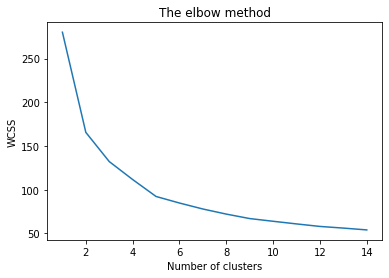

In [386]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(K, wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
# Within cluster sum of squares
plt.ylabel('WCSS')
plt.show()

### So the optimal number of clusters seems to be 4 as elbow method was depicting 5 while silhouette_score was giving a better value with 4

In [387]:
## Standardize the data and fit that standardized data to KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
kmeans = KMeans(n_clusters=4)


In [388]:
## Made a pipeline to perform these tasks together
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler,KMeans(n_clusters=4,init='k-means++',random_state=3222,max_iter=300))
pipeline.fit(features)
labels = pipeline.predict(features)
label_df = pd.DataFrame(labels)
np.shape(label_df)
features[['cluster_labels']] = label_df
features[['song_title']] = songs[['song_title']]
features[['artist']] = songs[['artist']]
features.head(10)

,acousticness,danceability,liveness,loudness,speechiness,cluster_labels,song_title,artist
0,0.01020,0.833,0.1650,0.741141,0.4310,3,Mask Off,Future
1,0.19900,0.743,0.1370,0.692162,0.0794,0,Redbone,Childish Gambino
2,0.03440,0.838,0.1590,0.791369,0.2890,3,Xanny Family,Future
3,0.60400,0.494,0.0922,0.544709,0.0261,1,Master Of None,Beach House
4,0.18000,0.678,0.4390,0.654132,0.0694,2,Parallel Lines,Junior Boys
5,0.00479,0.804,0.1640,0.805581,0.1850,3,Sneakin’,Drake
6,0.01450,0.739,0.2070,0.667673,0.1560,0,Childs Play,Drake
7,0.02020,0.266,0.1600,0.655322,0.0371,0,Gyöngyhajú lány,Omega
8,0.04810,0.603,0.3420,0.898780,0.3470,3,I've Seen Footage,Death Grips
9,0.00208,0.836,0.5710,0.771729,0.2370,2,Digital Animal,Honey Claws


## Performing Dimensionality Reduction for properly visualizing the data

In [389]:
# PCA to reduce our data to 2 dimensions for visualisation
from sklearn.decomposition import PCA
yfeatures = features.iloc[:,0:5]
kmeans.fit(yfeatures)
y_kmeans = kmeans.predict(yfeatures)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(yfeatures)

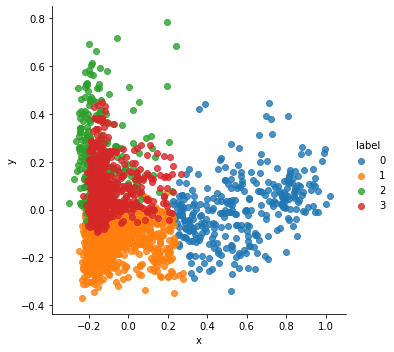

In [390]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [391]:
#Explained variance ratio will return the value for components
pca.explained_variance_ratio_

array([0.53393903, 0.20432391])

In [392]:
# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=yfeatures.columns,index = ['PC-1','PC-2']))

      acousticness  danceability  liveness  loudness  speechiness
PC-1      0.944877     -0.153574 -0.095453 -0.269430    -0.043790
PC-2     -0.036965     -0.746174  0.660915  0.065866    -0.026653


# Figuring out what the different clusters contain

In [393]:
#Counting the number of songs in each cluster
features = features.sample(frac=1)
features['cluster_labels'].value_counts()

0    1198
2     351
1     242
3     226
Name: cluster_labels, dtype: int64

In [394]:
#Analysing the first cluster
features[features['cluster_labels']==0].head(15)

,acousticness,danceability,liveness,loudness,speechiness,cluster_labels,song_title,artist
282,0.081000,0.651,0.1140,0.762946,0.0274,0,Enjoy The Silence - Remastered Version Original,Depeche Mode
1161,0.029300,0.726,0.1040,0.855566,0.1230,0,Unforgettable,French Montana
1138,0.005930,0.608,0.1210,0.893535,0.0464,0,Thunder,Imagine Dragons
485,0.040100,0.670,0.2930,0.851083,0.0922,0,In My Mind (Axwell Remix),Ivan Gough & Feenixpawl feat. Georgi Kay
1476,0.131000,0.522,0.1220,0.894297,0.1450,0,Open,Yellow Claw
618,0.007490,0.587,0.2640,0.860598,0.0469,0,Oh My - Club Mix,The Partysquad
414,0.195000,0.605,0.2460,0.837267,0.1500,0,Obedear,Purity Ring
1669,0.035900,0.761,0.0945,0.778286,0.0539,0,You Make Me Wanna...,Usher
96,0.060400,0.799,0.0338,0.759042,0.0396,0,The Magnificent Seven - Remastered,The Clash
1283,0.105000,0.528,0.1040,0.805581,0.0352,0,King Of The World,Natalie Grant


In [395]:
features[features['cluster_labels']==0].mean()

acousticness      0.111196
danceability      0.649136
liveness          0.126626
loudness          0.813342
speechiness       0.063918
cluster_labels    0.000000
dtype: float64

In [396]:
#Analysing the second cluster
features[features['cluster_labels']==1].head(10)

,acousticness,danceability,liveness,loudness,speechiness,cluster_labels,song_title,artist
1550,0.88600,0.386,0.1890,0.402714,0.0572,1,Angel Eyes,"Tommy Flanagan, Ron Carter & Tony Williams"
1856,0.96500,0.710,0.0889,0.548887,0.0534,1,Lost Boy,Ruth B.
1521,0.97300,0.478,0.1080,0.373590,0.0505,1,For Wee Folks,Joey Alexander
382,0.76500,0.561,0.1240,0.859835,0.0528,1,Indian Food,Dumbo Gets Mad
1540,0.82300,0.526,0.1140,0.610186,0.0411,1,Good Morning Heartache,Scott Hamilton
307,0.00079,0.771,0.3410,0.374565,0.0802,1,Kathy Lee,Jessy Lanza
1959,0.71900,0.836,0.0694,0.642940,0.0336,1,Grandad,Clive Dunn
1895,0.21900,0.701,0.0821,0.404117,0.0938,1,Blister in the Sun - 2002 Remastered Version,Violent Femmes
64,0.37400,0.549,0.1700,0.668893,0.0633,1,Ikimiz Bir Fidaniz - Baris K Edit,Umit Aksu Orkestrasi
1788,0.78900,0.664,0.1520,0.785026,0.0322,1,Perfect Harmony,Rags Cast


In [397]:
features[features['cluster_labels']==1].mean()

acousticness      0.762002
danceability      0.506727
liveness          0.151036
loudness          0.606494
speechiness       0.046136
cluster_labels    1.000000
dtype: float64

In [398]:
#Analysing the third cluster
features[features['cluster_labels']==2].head(10)

,acousticness,danceability,liveness,loudness,speechiness,cluster_labels,song_title,artist
1273,0.004970,0.574,0.333,0.862946,0.0299,2,Beloved,Jordan Feliz
680,0.104000,0.689,0.490,0.886459,0.0978,2,The Drop,Bro Safari
1323,0.000283,0.256,0.618,0.853614,0.0964,2,Zerotonin 2,Darknet
1366,0.026200,0.635,0.361,0.740988,0.0581,2,VAMOS,Oohyo
636,0.004170,0.900,0.524,0.987466,0.1480,2,The Lion - Original Mix,The Partysquad
1783,0.019300,0.439,0.373,0.862977,0.0439,2,In Love With a Girl,Gavin DeGraw
1903,0.185000,0.757,0.568,0.861147,0.0315,2,...Baby One More Time,Britney Spears
1414,0.045100,0.592,0.327,0.886947,0.0858,2,Litty (feat. Tory Lanez),Meek Mill
100,0.228000,0.630,0.487,0.859500,0.0590,2,Slumlord,Neon Indian
233,0.077800,0.729,0.382,0.816072,0.0708,2,Sanctified,Rick Ross


In [399]:
features[features['cluster_labels']==2].mean()

acousticness      0.061694
danceability      0.543536
liveness          0.445265
loudness          0.850336
speechiness       0.087878
cluster_labels    2.000000
dtype: float64

In [400]:
#Analysing the third cluster
features[features['cluster_labels']==3].head(10)

,acousticness,danceability,liveness,loudness,speechiness,cluster_labels,song_title,artist
1942,0.00733,0.845,0.0575,0.843214,0.188,3,Jenny from the Block - Track Masters Remix,Jennifer Lopez
556,0.08290,0.722,0.0533,0.755505,0.352,3,Females Welcomed (feat. Reija Lee),Trinidad James
792,0.36000,0.784,0.1150,0.798780,0.292,3,Tuesday,ILoveMakonnen
1187,0.06560,0.828,0.1220,0.713053,0.199,3,Lollipop,Lil Wayne
1611,0.28200,0.369,0.2660,0.847667,0.384,3,Close,IZECOLD
1967,0.00141,0.895,0.2740,0.737359,0.216,3,Hoochie Mama,2 LIVE CREW
259,0.01930,0.413,0.1000,0.776395,0.241,3,Pony,Pretty Sister
582,0.00207,0.931,0.0920,0.754224,0.269,3,Purp Walk,Lunice
816,0.17200,0.683,0.3570,0.849558,0.353,3,Holding On,Disclosure
1437,0.58800,0.614,0.1050,0.901769,0.352,3,Save You,Wahlstedt


In [401]:
features[features['cluster_labels']==3].mean()

acousticness      0.172998
danceability      0.691518
liveness          0.178742
loudness          0.798253
speechiness       0.302301
cluster_labels    3.000000
dtype: float64

In [402]:
## On analysing the mean feature values of the clusters following mood can be assigned to a song belonging to the particular clusterfeatures[features['cluster_labels']==0]:
mapping={0 : "Feeling energetic",1 : "Feeling Happy", 2:"Feeling passionate",3: "Feeling Calm"}
features['cluster_labels'] = [mapping[i] for i in features['cluster_labels']]
features.tail()



,acousticness,danceability,liveness,loudness,speechiness,cluster_labels,song_title,artist
112,0.65600,0.780,0.1290,0.696737,0.0329,Feeling Happy,Please Mr. Postman,The Marvelettes
698,0.00525,0.700,0.6570,0.815340,0.1490,Feeling passionate,No New Friends - SFTB Remix,DJ Khaled
1104,0.20400,0.685,0.0722,0.853248,0.0930,Feeling energetic,Si Tú La Ves,Nicky Jam
951,0.10900,0.748,0.1500,0.854437,0.0285,Feeling energetic,Bambi,Jidenna
1648,0.00354,0.568,0.4780,0.900915,0.0450,Feeling passionate,Starlight - Radio Mix,SOVI


## Yeah the model successfully clustered the songs in different mood groups

### Lets begin classifying the song the person is listening to, to these mood groups so that can come to know the mood of the person based on the somg

In [403]:
## We will try classifiying the songs using different classifiers and then using ensemble learning will try to vote and use the maximum accuracy
#Start by importing the required libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [404]:
## Detecting the features and the labels
X = features.iloc[:,[0,1,2,3,4]]
y = features.iloc[:,5]
X.head()

,acousticness,danceability,liveness,loudness,speechiness
282,0.08100,0.651,0.114,0.762946,0.0274
1161,0.02930,0.726,0.104,0.855566,0.1230
1138,0.00593,0.608,0.121,0.893535,0.0464
485,0.04010,0.670,0.293,0.851083,0.0922
1476,0.13100,0.522,0.122,0.894297,0.1450


In [405]:
y.head()

282     Feeling energetic
1161    Feeling energetic
1138    Feeling energetic
485     Feeling energetic
1476    Feeling energetic
Name: cluster_labels, dtype: object

## Splitting the training and test set

In [406]:
#Performed splitting having 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

# We will try classifying the song to the mood using different classifiers and will even use different ensemble learning methods like voting classifier,bagging,boosting,random forest and will see which is giving the most accurate result

## Ensemble Learning (Voting Classifier)

In [407]:
## Classification using Voting Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [408]:
##Instantiate the classifier
dt = DecisionTreeClassifier(max_depth=2,random_state=1)
lr = LogisticRegression(random_state=1)
knn = KNeighborsClassifier()

In [409]:
##Fitting the model to training data and comparing the accuracy of the classifiers
Classifiers = {'LogisticRegression':lr,'KNearestNeighbors':knn,'DecisionTreeClassifier':dt}
for clf_name,clf in Classifiers.items():
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print('{:s}:{:.3f}'.format(clf_name,accuracy_score(y_test,y_pred)))

LogisticRegression:0.929
KNearestNeighbors:0.944
DecisionTreeClassifier:0.840


In [410]:
##Using Voting Classifier
vc = VotingClassifier(estimators = Classifiers.items())
vc.fit(X_train,y_train)
y_pred = vc.predict(X_test)
print('Voting Classifier:{:.3f}'.format(accuracy_score(y_test,y_pred)))

Voting Classifier:0.944


In [411]:
##Evaluating Accuracy Using Confusion Matrix And Classification Report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 52   0   6   1]
 [  0  55  11   1]
 [  0   2 376   4]
 [  0   0   9  89]]
                    precision    recall  f1-score   support

      Feeling Calm       1.00      0.88      0.94        59
     Feeling Happy       0.96      0.82      0.89        67
 Feeling energetic       0.94      0.98      0.96       382
Feeling passionate       0.94      0.91      0.92        98

          accuracy                           0.94       606
         macro avg       0.96      0.90      0.93       606
      weighted avg       0.95      0.94      0.94       606



## Bagging Classifier

In [412]:
##It trains different models using the same algorithm for different parts of the training set 
from sklearn.ensemble import BaggingClassifier
seed=1
knn = KNeighborsClassifier()
bc = BaggingClassifier(base_estimator=knn,n_estimators=300,n_jobs=-1,random_state=3222)

In [413]:
##Fitting data to train and test and predicting
bc.fit(X_train,y_train)
y_pred = bc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.9504950495049505


In [414]:
##Evaluating Accuracy Using Confusion Matrix And Classification Report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 49   1   9   0]
 [  0  61   5   1]
 [  0   1 374   7]
 [  0   0   6  92]]
                    precision    recall  f1-score   support

      Feeling Calm       1.00      0.83      0.91        59
     Feeling Happy       0.97      0.91      0.94        67
 Feeling energetic       0.95      0.98      0.96       382
Feeling passionate       0.92      0.94      0.93        98

          accuracy                           0.95       606
         macro avg       0.96      0.91      0.93       606
      weighted avg       0.95      0.95      0.95       606



## Random Forest Classifier

In [415]:
#Instantiating the model
##Basically Random Forest is an ensemble method where the base estimator is the decision tree
rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.12,random_state=1)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8234323432343235

In [416]:
##Evaluating the model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  1   1  44  13]
 [  0  46  16   5]
 [  0   8 360  14]
 [  0   0   6  92]]
                    precision    recall  f1-score   support

      Feeling Calm       1.00      0.02      0.03        59
     Feeling Happy       0.84      0.69      0.75        67
 Feeling energetic       0.85      0.94      0.89       382
Feeling passionate       0.74      0.94      0.83        98

          accuracy                           0.82       606
         macro avg       0.86      0.65      0.63       606
      weighted avg       0.84      0.82      0.78       606

